In [2]:
# loading packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import scatter_matrix

In [3]:
# loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 
        'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']
df = pd.read_csv(url, names= names)

In [4]:
# take a look at the dataset
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Preprocessing
# df.replace('?', -99999, inplace= True)
df.drop(['ID'], axis=1, inplace= True)
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes
print(df.axes)
print(df.shape)


[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            689, 690, 691, 692, 693, 694, 695, 696, 697, 698],
           dtype='int64', length=683), Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')]
(683, 10)


In [6]:
df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
# Visualizing dataset
print(df['Class'].value_counts())
print(df.describe())

2    444
4    239
Name: Class, dtype: int64
            Clump    UnifSize   UnifShape     MargAdh  SingEpiSize  \
count  683.000000  683.000000  683.000000  683.000000   683.000000   
mean     4.442167    3.150805    3.215227    2.830161     3.234261   
std      2.820761    3.065145    2.988581    2.864562     2.223085   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      2.000000    1.000000    1.000000    1.000000     2.000000   
50%      4.000000    1.000000    1.000000    1.000000     2.000000   
75%      6.000000    5.000000    5.000000    4.000000     4.000000   
max     10.000000   10.000000   10.000000   10.000000    10.000000   

          BareNuc  BlandChrom    NormNucl         Mit       Class  
count  683.000000  683.000000  683.000000  683.000000  683.000000  
mean     3.544656    3.445095    2.869693    1.603221    2.699854  
std      3.643857    2.449697    3.052666    1.732674    0.954592  
min      1.000000    1.000000    1.000000    1.000000

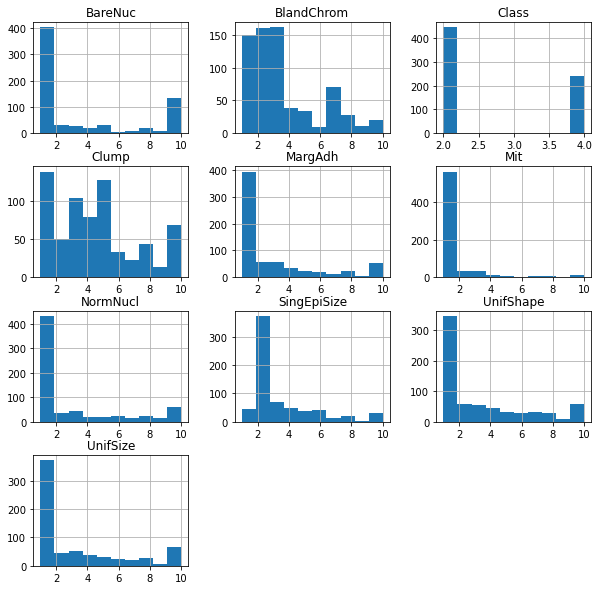

In [9]:
# plot histigram of dataframes
df.hist(figsize= (10,10))
plt.show()

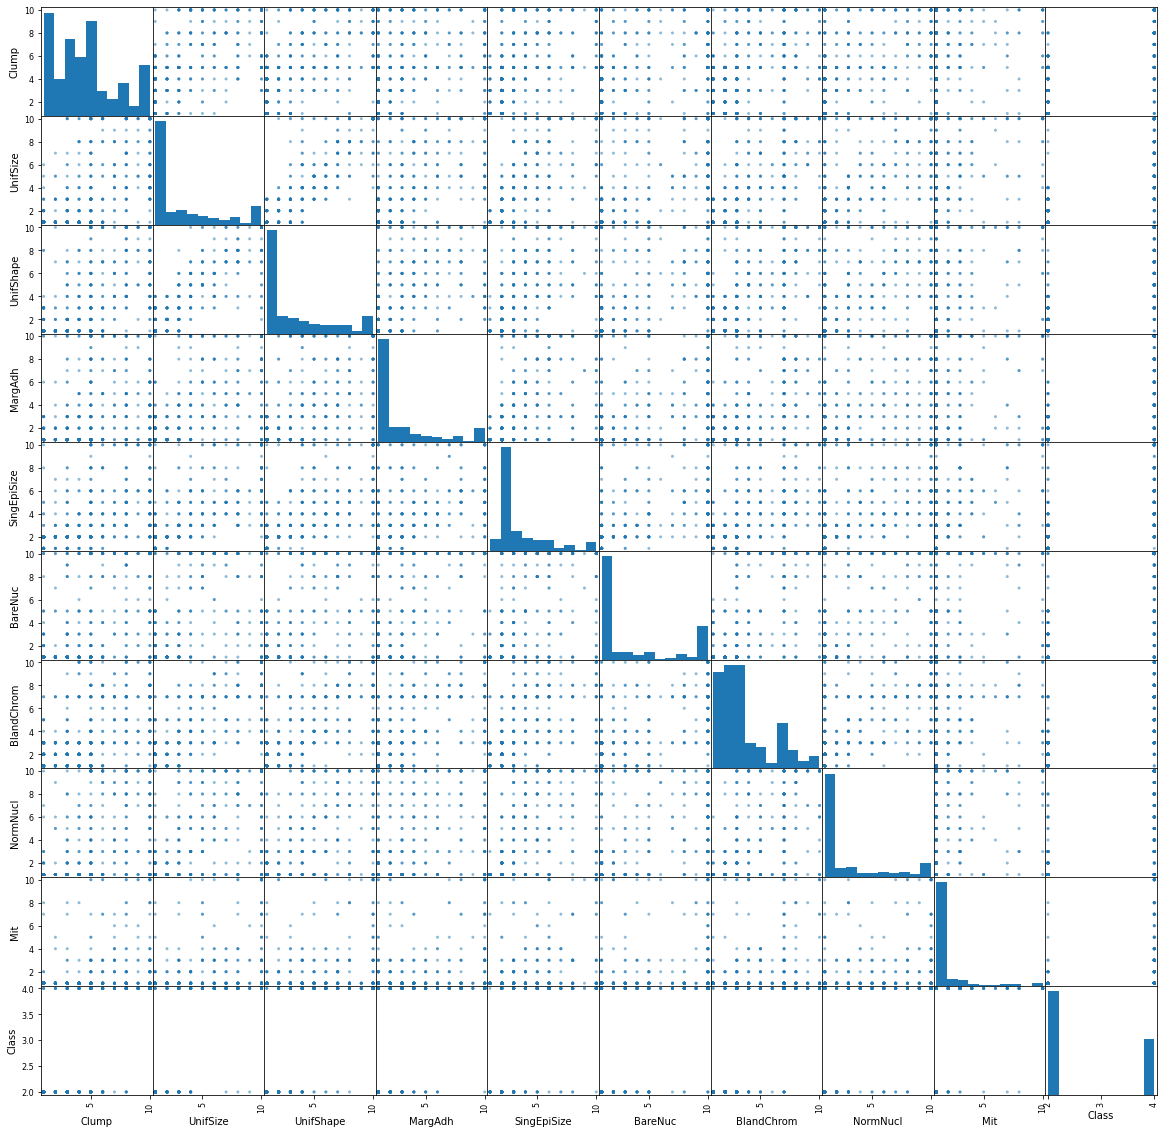

In [10]:
# Scatter plot matrix
scatter_matrix(df, figsize = (20,20))
plt.show()

In [11]:
# Spliting dataset to training and test
X = np.array(df.drop(['Class'], axis=1))
y = np.array(df['Class'])

X_train, X_test, y_train, Y_test = train_test_split( X, y, test_size=0.2)

In [12]:
print('Size of X_train is {}'.format(X_train.shape))
print('Size of y_train is {}'.format(y_train.shape))
print('Size of X_test is {}'.format(X_test.shape))
print('Size of y_train is {}'.format(Y_test.shape))

Size of X_train is (546, 9)
Size of y_train is (546,)
Size of X_test is (137, 9)
Size of y_train is (137,)


In [13]:
seed = 8
scoring = 'accuracy'
K = 5

In [14]:
# Define the model
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors= K)))
models.append(('SVM', SVC(kernel='rbf')))

# Evaluting the models
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle= True, random_state= seed)
    # evaluate the model
    scores = model_selection.cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
    results.append(scores)
    names.append(name)
    msg = "%s %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)

KNN 0.974276 (0.020454)
SVM 0.976061 (0.021855)


In [ ]:
results
models

In [15]:
# Make prediction

for name, model in models:
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predict))
    print(classification_report(Y_test, predict))

KNN
0.9416058394160584
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        92
           4       0.91      0.91      0.91        45

    accuracy                           0.94       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.94      0.94      0.94       137

SVM
0.948905109489051
              precision    recall  f1-score   support

           2       0.98      0.95      0.96        92
           4       0.90      0.96      0.92        45

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



In [ ]:
models